# Dimensionality Reduction on the MNIST

This kernel introduces a sense of how the **Dimensionality Reduction (DR)** can improve either the training process or exploring the data. How it can by done? It just reduces the number of dimensions to get more clear insights about the data. We can simplify the main Advantages of the Dimensionality Reduction as follows


*   Speed up the training time (NOT ALWAYS)
*   Visualizing  the data
*   compression for the data
*   Get rid of the noise (OR get rid of important information *sure not on purpose*)




The two main approaches for DR



*   Projection 
*   Manifold Learning 

Both approaches will be discussed using various techniques like...





*   TSNE
*   PCA
*   LLE

of course, as well as other techniques that we shall see together 






# Loading and Spliting **Mnist**

We will load the popular most dataset using  ```fetch_openml``` from sklearn.
The *mnist* consist of **60000**  different image each of them consist of 28 * 28 pixels considering these dimensions we will have in total a **784 features**
We will take **10000** for testing using `train_test_split` from sklearn

In [1]:
from sklearn.datasets import fetch_openml

In [2]:
mnist = fetch_openml('mnist_784', version=1)

In [3]:
from sklearn.model_selection import train_test_split
X, y = mnist['data'], mnist['target']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=10000)

# Random Forest Classifier on the Original Features

A random forest classifier built using `sklearn. Ensemble. RandomForestClassifier ` which managed to achieve about **96% Accuracy** on the testset measuring the time it takes using the `time` module and take about **68 seconds** to fit on the data using please remember that this training done on the all ***784 features***

In [4]:
import time
from sklearn.ensemble import RandomForestClassifier
rnf_clf = RandomForestClassifier()
t0 = time.time()
rnf_clf.fit(X_train, y_train)
print(rnf_clf.__class__.__name__,'Training time:', time.time() - t0)
print(rnf_clf.__class__.__name__,'Accuracy:', rnf_clf.score(X_test, y_test))

RandomForestClassifier Training time: 51.283074140548706
RandomForestClassifier Accuracy: 0.9712


# Principle Component Analysis (PCA)

The first approach is projected using **PCA** and we are joined to use `sklearn.Decomposition.PCA` you can note from the code that we used `n_component` argument which can either take an `integer or float` .In case of it takes, an `integer` value it just the number of **principle components** you want, on other words the number of dimensions aka. **features** you want your data to be represented in, the other choice is to put `float` in this case the `. fit_transform` will return the **minmum** number of components that preserve the amount of information 
In our case we set it to be 0.95 so we need the minimum number of principle components that keeps 95% of the information in the data

In [5]:
from sklearn.decomposition import PCA
pca = PCA(n_components=0.95)
X_train_reduced = pca.fit_transform(X_train)
X_test_reduced = pca.transform(X_test)

In [6]:
print(X_train_reduced.shape)

(60000, 154)


**Amazing !!!** we managed to keep 95% of information only 5% loss just by using **154 features**, now lets train the same Forest and see how it performs 

In [7]:
rnf_clf_reduced = RandomForestClassifier()
t0 = time.time()
rnf_clf_reduced.fit(X_train_reduced, y_train)
print(rnf_clf_reduced.__class__.__name__, "Training time:", time.time() - t0)
print(rnf_clf_reduced.__class__.__name__, "Accuracy:", rnf_clf_reduced.score(X_test_reduced, y_test))

RandomForestClassifier Training time: 122.66313982009888
RandomForestClassifier Accuracy: 0.9455


Well, it performs quite well with too much less features recall, we down from 784 to 154 but it takes much longer time but Why?? The answer for this question is that the data in a lower dimension might be harder to fit than a higher dimension and other cases the higher is easier to fit 
Generally it depends on the data 

# Dimensionality Reduction for Visulization

In this case we will see how DR can help us to visualize high dimensional data in 3D or 2D and get amazing sense about it. We will just use a random set of the training data 10000 since no need to look for the whole 60000 images


In [8]:
import numpy as np

In [9]:
idx = np.random.permutation(60000)[:10000]
X = mnist['data'][idx]
y = mnist['target'][idx]

## TSNE technique

This is ***manifolding*** technique the default `n_components` are equal to 2 to help us to visualize the data



In [10]:
from sklearn.manifold import TSNE
tsne = TSNE()
X_plot_tsne = tsne.fit_transform(X)

In [11]:
import matplotlib.pyplot as plt

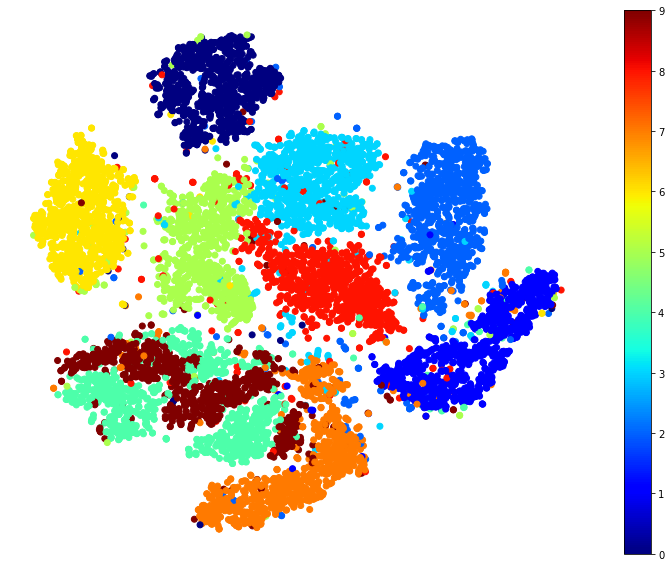

In [12]:
plt.figure(figsize=(13, 10))
plt.scatter(X_plot_tsne[:, 0], X_plot_tsne[:, 1], c = [int(i) for i in y] , cmap="jet")
plt.colorbar()
plt.axis('off')
plt.show()

An absolute beautiful image that shows you many information about the data that you can't observe in a higher dimension. Take for example


*   the numbers like 3 and 5 are overlapped together, which you can observe from the data because they are quite similar in the images
*   numbers like 0 and 1 are quite and well separated so it's hard for any missclassification to happen the following classifier can approximately achieve 100% Accuracy on 0, 1



### 01 Classifier

In [13]:
index_train_01 = [i for i in range(len(y_train)) if y_train[i] in ['0', '1']]
X_train_01 = X_train[index_train_01]
y_train_01 = y_train[index_train_01]
index_test_01 = [i for i in range(len(y_test)) if y_test[i] in ['0', '1']]
X_test_01 = X_test[index_test_01]
y_test_01 = y_test[index_test_01]

In [14]:
rnd_clf_01 = RandomForestClassifier()
t0 = time.time()
rnd_clf_01.fit(X_train_01, y_train_01)
print(rnd_clf_01.__class__.__name__, "Training time:", time.time() - t0)
print(rnd_clf_01.__class__.__name__, "Accuracy:", rnd_clf_01.score(X_test_01, y_test_01))

RandomForestClassifier Training time: 4.210344314575195
RandomForestClassifier Accuracy: 0.999061473486626


## PCA technique

In [15]:
pca = PCA(n_components=2)
X_plot_pca = pca.fit_transform(X)

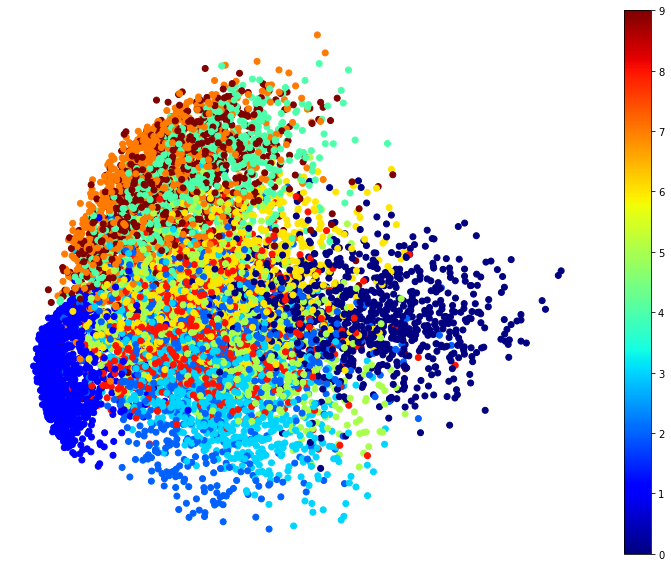

In [16]:
plt.figure(figsize=(13, 10))
plt.scatter(X_plot_pca[:, 0], X_plot_pca[:, 1], c = [int(i) for i in y] , cmap="jet")
plt.colorbar()
plt.axis('off')
plt.show()

A huge diffience between the PCA and TSNE which you can see from the images that the TSNE gives better visulization

Note that the below plot about the preserved variance and the n_component used by the PCA. Note that we got an elbow for the plot approximately 100 which you can conclude that this the best number of principle components.

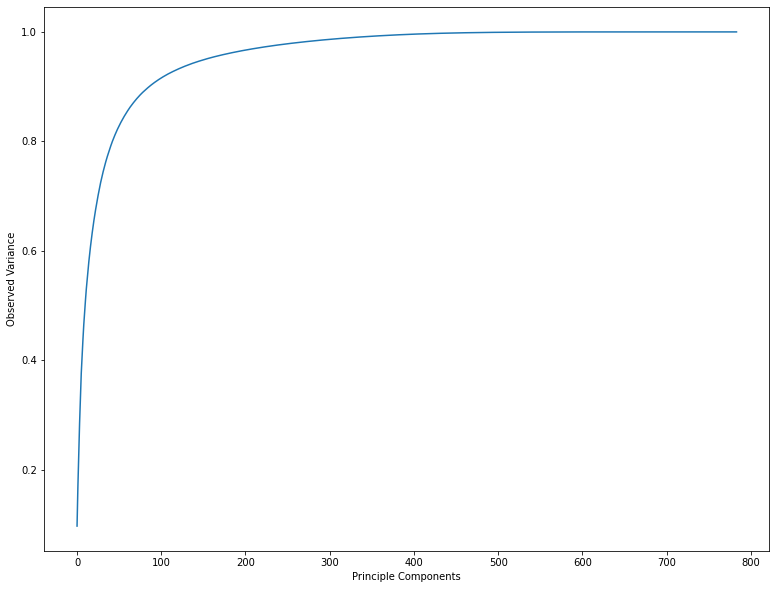

In [17]:
pca_draw = PCA()
pca_draw.fit(X_train)
cum_sum = np.cumsum(pca_draw.explained_variance_ratio_)
plt.figure(figsize=(13, 10))
plt.plot(list(range(len(cum_sum))), cum_sum)
plt.ylabel("Observed Variance")
plt.xlabel("Principle Components")
plt.show()

## Locally Linear Embedding (LLE)

In [18]:
from sklearn.manifold import LocallyLinearEmbedding
lle = LocallyLinearEmbedding()
X_plot_lle = lle.fit_transform(X)

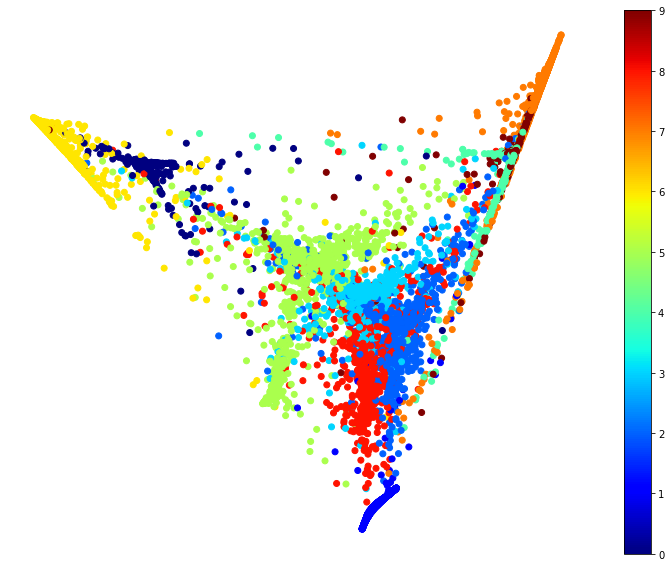

In [19]:
plt.figure(figsize=(13, 10))
plt.scatter(X_plot_lle[:, 0], X_plot_lle[:, 1], c = [int(i) for i in y] , cmap="jet")
plt.colorbar()
plt.axis('off')
plt.show()

## Linear Discriminant Analysis

In [20]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
lda = LinearDiscriminantAnalysis(n_components=2)
X_plot_lda = lda.fit_transform(X, y)

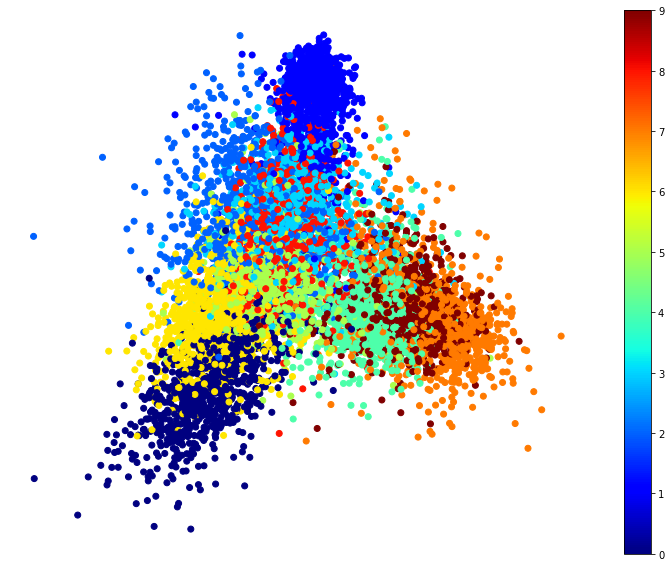

In [21]:
plt.figure(figsize=(13, 10))
plt.scatter(X_plot_lda[:, 0], X_plot_lda[:, 1], c = [int(i) for i in y] , cmap="jet")
plt.colorbar()
plt.axis('off')
plt.show()

## Multidimensional scaling(MDS)

The MDS takes a lot of time in order to fit the data so will try it only on 2000 instance

In [22]:
idx = np.random.permutation(60000)[:2000]
X_mds = mnist['data'][idx]
y_mds = mnist['target'][idx]

In [23]:
from sklearn.manifold import MDS
mds = MDS()
X_plot_mds = mds.fit_transform(X_mds)

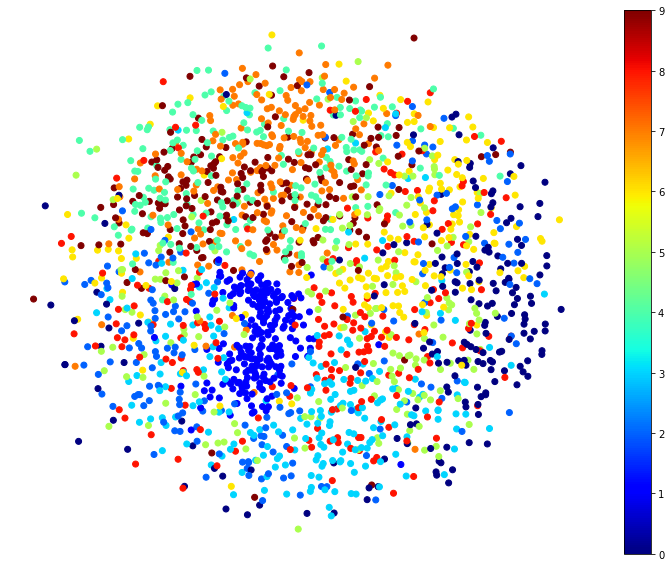

In [24]:
plt.figure(figsize=(13, 10))
plt.scatter(X_plot_mds[:, 0], X_plot_mds[:, 1], c = [int(i) for i in y_mds] , cmap="jet")
plt.colorbar()
plt.axis('off')
plt.show()

As you can see a lot of data is overlapped and you can't distinguish any of the classes so it's not the best for the visualization at least for this data set

# Conclusion


Using the  Dimeninality education gives us the  ability to see our data better training and visualization and many other features you can try to use like PCA kernel, IncrementalPCA or many other techniques that you can find.


Leave me a comment I totally appreciate your feedback and it's totally helpful for me 🥰 🥰 🥰